# TensorFlow激励函数Activation Function
https://www.tensorflow.org/api_guides/python/nn
- tf.nn.relu
- tf.nn.relu6
- tf.nn.crelu
- tf.nn.elu
- tf.nn.softplus
- tf.nn.softsign
- tf.nn.dropout
- tf.nn.bias_add
- tf.sigmoid
- tf.tanh

# TensorFlow添加层
写一个添加神经层的函数

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def add_layer(inputs, n_features, neurons, activation_function=None):
    '''一个神经层包括输入值，输入大小，输出大小，激励函数'''
    Weights = tf.Variable(tf.random_normal([n_features, neurons])) # 定义一个in_size*out_size的服从正态分布的随机张量
    biases = tf.Variable(tf.zeros([1, neurons]) + 0.1) # 定义一个1*out_size的偏置，由于不推荐为0，加0.1
    Wx_plus_b = tf.matmul(inputs, Weights) + biases # (m_samples, n_features)*(n_features, neurons)+(1, neurons)
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    
    return outputs

构造数据测试

In [3]:
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis] #-1到1的300个数据 
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32) # 高斯噪声，均值0，方差0.05
y_data = x_data**2 + x_data**3 + noise
print x_data.shape
print noise.shape
print y_data.shape

(300, 1)
(300, 1)
(300, 1)


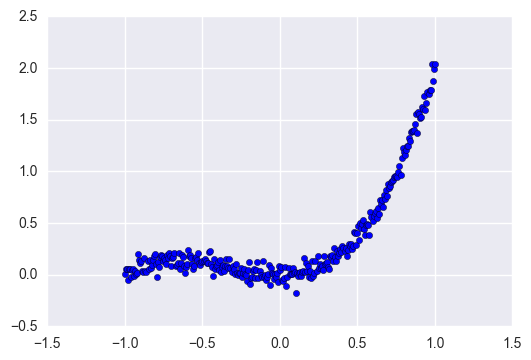

In [4]:
plt.scatter(x_data, y_data)
plt.show()

搭建神经网络

In [5]:
# 定义两个占位符
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

接下来，我们就可以开始定义神经层了。 通常神经层都包括输入层、隐藏层和输出层。这里的输入层只有一个属性， 所以我们就只有一个输入；隐藏层我们可以自己假设，这里我们假设隐藏层有10个神经元； 输出层和输入层的结构是一样的，所以我们的输出层也是只有一层。 所以，我们构建的是——输入层1个、隐藏层10个、输出层1个的神经网络。

In [6]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)
# 计算预测值prediction和真实值的误差，对二者差的平方求和再取平均。
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [7]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(3000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 100 == 0:
            print sess.run(loss, feed_dict={xs: x_data, ys: y_data})

0.122185
0.0115992
0.00780947
0.00669322
0.00736847
0.00554291
0.00795926
0.00651576
0.00494634
0.00828576
0.00757576
0.00473224
0.00648517
0.0110519
0.0047735
0.00482114
0.0082734
0.00821902
0.00484514
0.00498232
0.00721956
0.00687018
0.00509122
0.00502757
0.00620066
0.00742017
0.00544831
0.00481758
0.00538959
0.00700099


可以看到loss越来越小

# 结果可视化

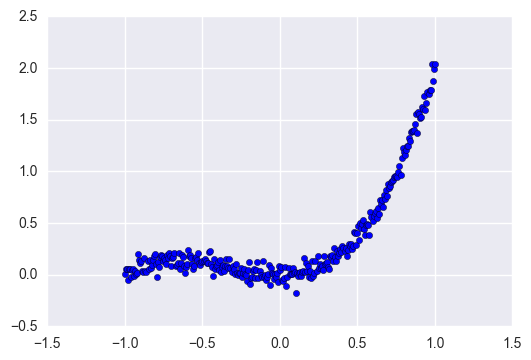

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

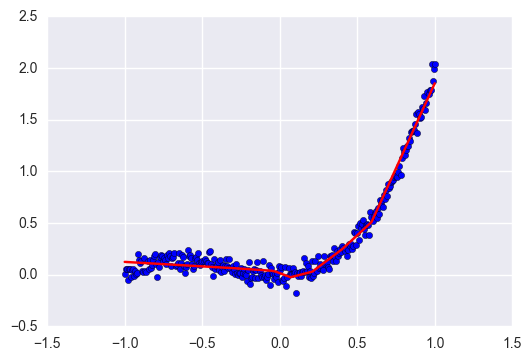

In [9]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
#         if i % 50 == 0:
#             try:
#                 ax.lines.remove(lines[0])
#             except Exception:
#                 pass
#             prediction_value = sess.run(prediction, feed_dict={xs: x_data})
#             lines = ax.plot(x_data, prediction_value, 'r-')
#             plt.pause(0.1)
    prediction_value = sess.run(prediction, feed_dict={xs: x_data})
    plt.plot(x_data, prediction_value, 'r-')
    plt.scatter(x_data, y_data)
    plt.ion()
    plt.show()
    

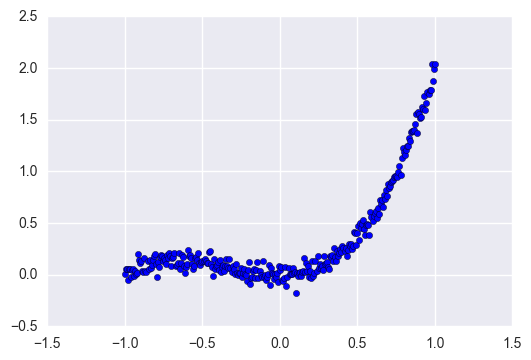

In [10]:
# 这里不能动画
sess = tf.Session()
init = tf.global_variables_initializer()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

sess.run(init)
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(1)